# Text Classification with Pytorch

- [Spam Ham Classification](https://www.kaggle.com/aaditkapoor1201/pytorch-spam-ham-classification)

In [53]:
%matplotlib inline
import torch
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import spacy #load spacy

In [54]:
import torch.nn.functional as F

In [73]:
from torch import nn
from torch.autograd import Variable

In [30]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [2]:
DATA_DIR = "/home/sankarshan/Documents/code/dataset/textdata/"

In [3]:
!ls -lshrt {DATA_DIR}

total 354M
 64M -rwxrwxrwx 1 sankarshan sankarshan  64M Mar  9  2019 IMDB_Dataset.csv
956K -rw-r--r-- 1 sankarshan sankarshan 956K May  8 21:48 ml-latest-small.zip
265M -rw-r--r-- 1 sankarshan sankarshan 265M May  8 21:50 ml-latest.zip
4.0K -rw-r--r-- 1 sankarshan sankarshan   71 Oct 19 23:39 README.md
 26M -rw-rw-r-- 1 sankarshan sankarshan  26M Oct 19 23:42 imdb-dataset-of-50k-movie-reviews.zip
4.0K drwxr-xr-x 2 sankarshan sankarshan 4.0K Oct 19 23:43 ml-latest-small


In [4]:
df = pd.read_csv(DATA_DIR+'IMDB_Dataset.csv')

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
def clean_review(text):
    # Strip HTML tags
    text = re.sub('<[^<]+?>', ' ', text)
 
    # Strip escaped quotes
    text = text.replace('\\"', '')
 
    # Strip quotes
    text = text.replace('"', '')
    
    text = text.lower()
 
    return text

def normalize(comment, lowercase=True):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        if not word.is_stop:
            lemma = word.lemma_.strip()
            lemmatized.append(lemma)
        
    return " ".join(lemmatized)


In [ ]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'tagger', 'ner'])
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [7]:
%%time
df['cleaned_review'] = df['review'].apply(clean_review)
df['normalized_review'] = df['cleaned_review'].apply(normalize) 

In [18]:
df.head()

,review,sentiment,cleaned_review,normalized_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,reviewer mention watch 1 oz episode hook . rig...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. the filming t...,wonderful little production . film technique ...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...,basically family little boy ( jake ) think zom...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei's love in the time of money is a...,petter mattei love time money visually stun fi...


In [23]:
df.iloc[0, 0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [25]:
df.iloc[0, 2]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.  the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.  it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.  i would say the main appeal of the show is due to the fact that it goes where other sh

In [26]:
df.iloc[0, 3]

'reviewer mention watch 1 oz episode hook . right , exactly happen .  thing strike oz brutality unflinching scene violence , set right word . trust , faint hearted timid . pull punch regard drug , sex violence . hardcore , classic use word .  call oz nickname give oswald maximum security state penitentary . focus mainly emerald city , experimental section prison cell glass front face inwards , privacy high agendum . -PRON- city home .. aryans , muslims , gangstas , latinos , christians , italians , irish .... scuffle , death stare , dodgy dealings shady agreement far away .  main appeal fact go show dare . forget pretty picture paint mainstream audience , forget charm , forget romance ... oz mess . episode see strike nasty surreal , ready , watch , develope taste oz , get accustom high level graphic violence . violence , injustice ( crook guard sell nickel , inmate kill order away , mannered , middle class inmate turn prison bitch lack street skill prison experience ) watch oz , comfor

In [38]:
df.shape

(50000, 4)

In [33]:
df.sentiment = df.sentiment.map({"positive": 1, "negative":0})

In [36]:
features = df.normalized_review.values
labels = df.sentiment.values
num_words = 1000

In [41]:
features.shape , labels.shape

((50000,), (50000,))

In [42]:
t = Tokenizer(num_words=1000)
t.fit_on_texts(features)

In [45]:
features = t.texts_to_matrix(features, mode='tfidf')

## Understand the dimension

- `input_dim`: dimension of the input paragraph/review
  - remember each input `normalized_review` is transformed into a `1000` dimension vector by keras tokenizer
  
- `hidden_dim`: denotes the number of neurons in the hidden layer

- `output_dim`: denotes the number of category

In [52]:
input_dim = num_words
hidden_dim = 100
output_dim = 2

In [63]:
# Building model

class LinNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.l1 = nn.Linear(input_dim, hidden_dim)
        self.l2 = nn.Linear(hidden_dim, hidden_dim)
        self.l3 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        
        # shape of X: (batch_size, input_dim)
        out = F.relu(self.l1(x))
        out = F.relu(self.l2(out))
        out = self.l3(out)
        
        return out

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, shuffle=True, random_state=34)


In [100]:
def train(epochs):
    loss_hist = []
    acc_hist = []
    
    x_train = Variable(torch.from_numpy(features_train)).float()
    y_train = Variable(torch.from_numpy(labels_train)).long()
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)
        pred = torch.max(y_pred, 1)[1].eq(y_train).sum()
        acc = float(pred)/float(len(x_train))
        status = f"epoch {epoch+1}/{epochs}\tloss: {loss.item():.4}\t acc: {acc:.4}" 
        print(status)
        loss_hist.append(np.round(loss.item(),4))
        acc_hist.append(np.round(acc,2))
        
        loss.backward()
        optimizer.step()

    return loss_hist, acc_hist

In [110]:
def test(epochs):
    loss_hist = []
    acc_hist = []
    
    model.eval()
    x_test = Variable(torch.from_numpy(features_test)).float()
    y_test = Variable(torch.from_numpy(labels_test)).long()
    for epoch in range(epochs):
        with torch.no_grad():
            y_pred = model(x_test)
            loss = criterion(y_pred, y_test)
            pred = torch.max(y_pred, 1)[1].eq(y_test).sum()
            
            acc = float(pred)/float(len(x_test))
            status = f"epoch {epoch+1}/{epochs}\tloss: {loss.item()}\t acc: {acc} %" 
            print(status)
            
            loss_hist.append(np.round(loss.item(),4))
            acc_hist.append(np.round(acc,4))
    
    return loss_hist, acc_hist

In [104]:
model = LinNet(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [105]:
%%time
loss_hist, acc_hist = train(100)

epoch 0/100	loss: 0.691	 acc: 0.5314
epoch 1/100	loss: 0.5422	 acc: 0.7898
epoch 2/100	loss: 0.6445	 acc: 0.7559
epoch 3/100	loss: 1.615	 acc: 0.5735
epoch 4/100	loss: 0.499	 acc: 0.7926
epoch 5/100	loss: 0.5271	 acc: 0.7665
epoch 6/100	loss: 0.657	 acc: 0.6785
epoch 7/100	loss: 0.6034	 acc: 0.6775
epoch 8/100	loss: 0.5468	 acc: 0.7199
epoch 9/100	loss: 0.5289	 acc: 0.7774
epoch 10/100	loss: 0.5261	 acc: 0.8299
epoch 11/100	loss: 0.5132	 acc: 0.8505
epoch 12/100	loss: 0.4822	 acc: 0.8539
epoch 13/100	loss: 0.4397	 acc: 0.855
epoch 14/100	loss: 0.4037	 acc: 0.8513
epoch 15/100	loss: 0.3826	 acc: 0.8488
epoch 16/100	loss: 0.3542	 acc: 0.8604
epoch 17/100	loss: 0.3521	 acc: 0.8549
epoch 18/100	loss: 0.3477	 acc: 0.8585
epoch 19/100	loss: 0.3411	 acc: 0.8655
epoch 20/100	loss: 0.3416	 acc: 0.8653
epoch 21/100	loss: 0.3274	 acc: 0.8697
epoch 22/100	loss: 0.3252	 acc: 0.8675
epoch 23/100	loss: 0.3117	 acc: 0.8723
epoch 24/100	loss: 0.3134	 acc: 0.8695
epoch 25/100	loss: 0.3044	 acc: 0.8723
e

In [109]:
test_loss_hist, test_acc_hist = test(100)

epoch 1/100	loss: 0.6522384881973267	 acc: 0.83448 %
epoch 2/100	loss: 0.6522384881973267	 acc: 0.83448 %
epoch 3/100	loss: 0.6522384881973267	 acc: 0.83448 %
epoch 4/100	loss: 0.6522384881973267	 acc: 0.83448 %
epoch 5/100	loss: 0.6522384881973267	 acc: 0.83448 %
epoch 6/100	loss: 0.6522384881973267	 acc: 0.83448 %
epoch 7/100	loss: 0.6522384881973267	 acc: 0.83448 %
epoch 8/100	loss: 0.6522384881973267	 acc: 0.83448 %
epoch 9/100	loss: 0.6522384881973267	 acc: 0.83448 %
epoch 10/100	loss: 0.6522384881973267	 acc: 0.83448 %
epoch 11/100	loss: 0.6522384881973267	 acc: 0.83448 %
epoch 12/100	loss: 0.6522384881973267	 acc: 0.83448 %
epoch 13/100	loss: 0.6522384881973267	 acc: 0.83448 %
epoch 14/100	loss: 0.6522384881973267	 acc: 0.83448 %
epoch 15/100	loss: 0.6522384881973267	 acc: 0.83448 %
epoch 16/100	loss: 0.6522384881973267	 acc: 0.83448 %
epoch 17/100	loss: 0.6522384881973267	 acc: 0.83448 %
epoch 18/100	loss: 0.6522384881973267	 acc: 0.83448 %
epoch 19/100	loss: 0.6522384881973267

Text(0, 0.5, 'loss')

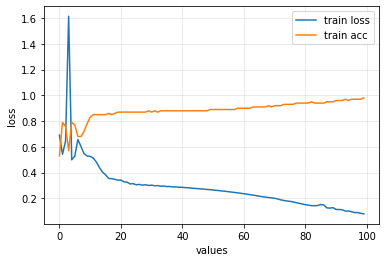

In [116]:
plt.figure()
plt.plot(loss_hist, label = "train loss")
plt.plot(acc_hist ,label="train acc")
plt.legend()
plt.xlabel("values")
plt.grid(alpha=0.3)
plt.ylabel("loss")